In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [123]:
# load data from CSV file
df = pd.read_csv("drive/My Drive/IOT/colombo_rh_2012-2018.csv")
df.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


In [124]:
# drop null values
df = df.dropna()

In [125]:
# selecting required columns
df = df[['year', 'month', 'day', 'obs_val']]

In [126]:
# combining date columns into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [127]:
# dropping individual date columns
df.drop(columns=['year', 'month', 'day'])

,obs_val,date
0,91.0,2012-01-01
1,90.0,2012-01-02
2,89.0,2012-01-03
3,89.0,2012-01-04
4,95.0,2012-01-05
...,...,...
4398,90.0,2018-12-27
4399,88.0,2018-12-28
4400,76.0,2018-12-29
4401,81.0,2018-12-30


In [128]:
df.dtypes

year                int64
month               int64
day                 int64
obs_val           float64
date       datetime64[ns]
dtype: object

In [129]:
df.set_index('date', inplace=True)
df

,year,month,day,obs_val
date,,,,
2012-01-01,2012,1,1,91.0
2012-01-02,2012,1,2,90.0
2012-01-03,2012,1,3,89.0
2012-01-04,2012,1,4,89.0
2012-01-05,2012,1,5,95.0
...,...,...,...,...
2018-12-27,2018,12,27,90.0
2018-12-28,2018,12,28,88.0
2018-12-29,2018,12,29,76.0


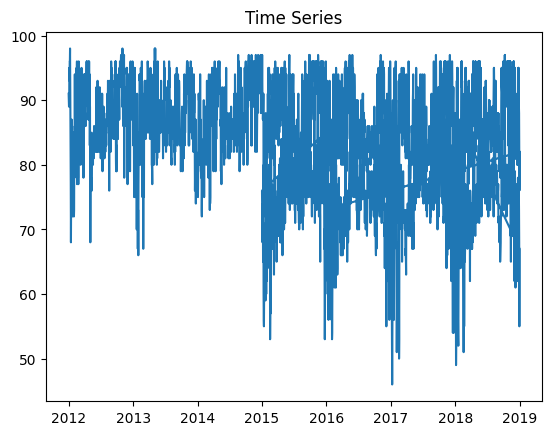

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


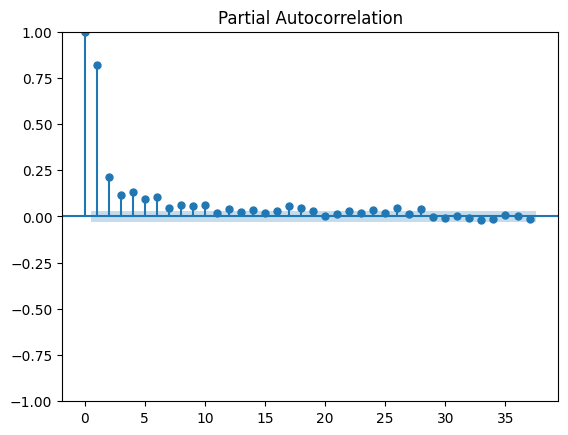

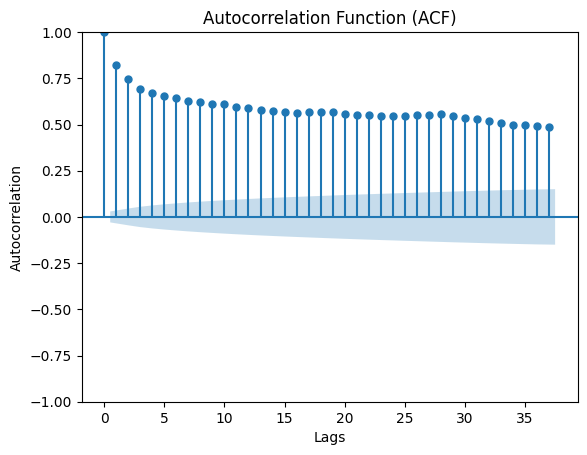

In [131]:
# plot the time series
plt.plot(df.obs_val)
plt.title('Time Series')
plt.show()

# PACF plot -> AR(p) term
plot_pacf(df.obs_val,)

# ACF plot -> MA(q) term
plot_acf(df.obs_val)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [132]:
# ADF test results
adf_test = adfuller(df.obs_val)
print(f'p-value: {adf_test[1]}')

p-value: 0.0013343696755980855


<Axes: xlabel='date'>

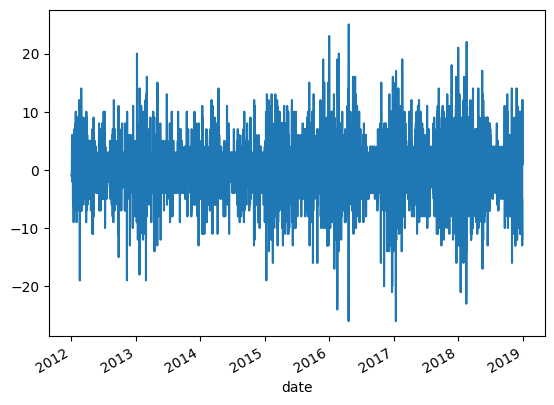

In [133]:
df_diff = df.obs_val.diff().dropna()
df_diff.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


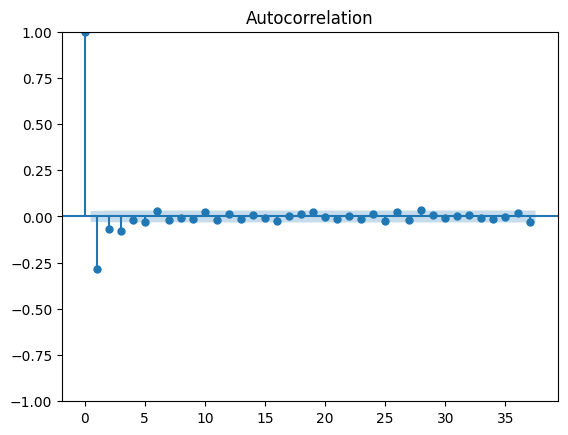

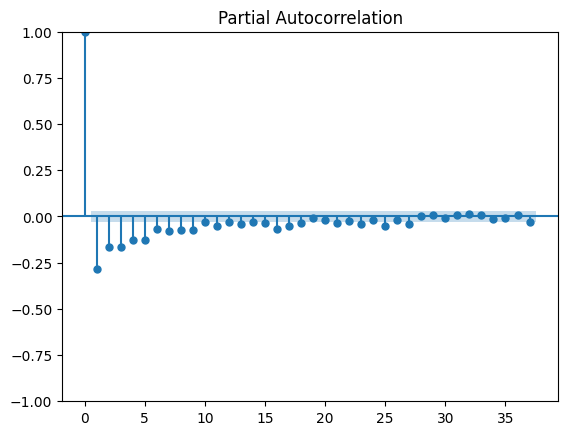

In [134]:
acf_diff = plot_acf(df_diff)

pacf_diff = plot_pacf(df_diff)

In [135]:
adf_test = adfuller(df_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


In [136]:
# Find the optimal values for p, d, q
stepwise_fit = auto_arima(df['obs_val'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25785.544, Time=4.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26700.488, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26333.327, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26123.466, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26698.488, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25786.441, Time=4.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25785.853, Time=3.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25784.378, Time=7.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25787.339, Time=5.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25786.321, Time=12.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25786.442, Time=9.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25784.297, Time=9.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25787.795, Time=4.21 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=25786.222, Time=13.18 sec
 ARIMA(1,1,4)(0,0

In [137]:
# fitting the ARIMA model with p=2, d=1, q=3
model = ARIMA(df.obs_val, order=(2, 1, 3))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                obs_val   No. Observations:                 4383
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -12885.149
Date:                Sun, 07 May 2023   AIC                          25782.298
Time:                        12:29:37   BIC                          25820.609
Sample:                             0   HQIC                         25795.815
                               - 4383                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3527      0.055     -6.373      0.000      -0.461      -0.244
ar.L2          0.5395      0.045     11.909      0.000       0.451       0.628
ma.L1         -0.0880      0.057     -1.545      0.1

In [138]:
# Drop the duplicate values
df = df.loc[~df.index.duplicated()]

In [139]:
# splitting data into train and test sets
df_train = df['2012-01-01':'2017-12-31']
df_test = df['2018-01-01':'2018-12-31']

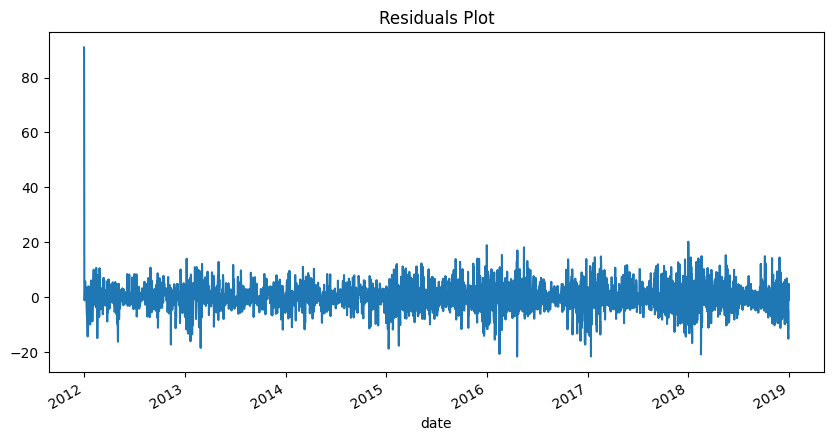

In [141]:
# Plot residuals
residuals = model_fit.resid

# Check the distribution of residuals (whether normally distributed or not)
residuals.plot(figsize=(10,5))
plt.title('Residuals Plot')
plt.show()

In [142]:
# Predictions 
forecast_pred = model_fit.predict(start = len(df)+1, end= len(df)+729)

In [143]:
# Index correction for prediction dataset
RH_pred = pd.date_range(start='2022-05-03', end='2024-04-30')
forecast_pred.index = RH_pred
forecast_pred

2022-05-03    86.381378
2022-05-04    84.918533
2022-05-05    80.878201
2022-05-06    79.107842
2022-05-07    75.478315
                ...    
2024-04-26    64.211816
2024-04-27    67.824932
2024-04-28    75.697661
2024-04-29    77.886498
2024-04-30    73.949746
Freq: D, Name: predicted_mean, Length: 729, dtype: float64

In [144]:
# Save Relative humidity predictions from 2022-05-03 to 2024-04-30 in a Dataframe
RH_val = pd.DataFrame(forecast_pred).reset_index()
RH_val

,index,predicted_mean
0,2022-05-03,86.381378
1,2022-05-04,84.918533
2,2022-05-05,80.878201
3,2022-05-06,79.107842
4,2022-05-07,75.478315
...,...,...
724,2024-04-26,64.211816
725,2024-04-27,67.824932
726,2024-04-28,75.697661
727,2024-04-29,77.886498


Text(0, 0.5, 'Relative Humidity')

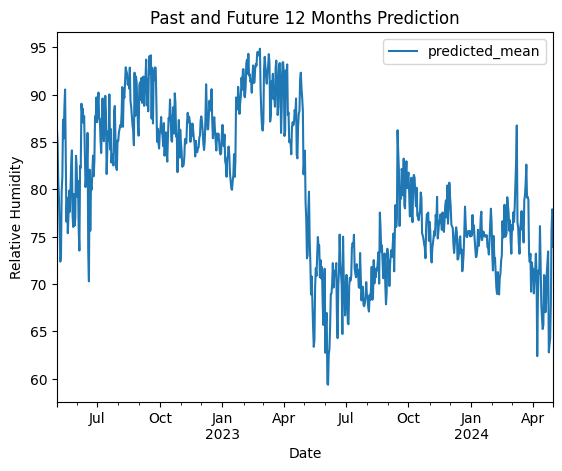

In [145]:
forecast_pred.plot(legend=True)
plt.title('Past and Future 12 Months Prediction')
plt.xlabel('Date')
plt.ylabel('Relative Humidity')

In [146]:
# Past 12 months Relative Humidity Predictions (From "2022-05-03" to "2023-05-02")
past_RH_val = RH_val[RH_val['index'] <= '2023-05-02']
past_RH_val

,index,predicted_mean
0,2022-05-03,86.381378
1,2022-05-04,84.918533
2,2022-05-05,80.878201
3,2022-05-06,79.107842
4,2022-05-07,75.478315
...,...,...
360,2023-04-28,89.652121
361,2023-04-29,88.325837
362,2023-04-30,81.586382
363,2023-05-01,83.113990


In [147]:
# Save predicted past RH values to CSV
past_RH_val.to_csv('past_RHval.csv')

In [148]:
# Future 12 months Relative Humidity Predictions (From "2023-05-02" to "2024-04-30")
future_RH_val = RH_val[RH_val['index'] >= '2023-05-02']
future_RH_val

,index,predicted_mean
364,2023-05-02,84.079213
365,2023-05-03,78.588971
366,2023-05-04,76.801598
367,2023-05-05,72.715845
368,2023-05-06,73.003575
...,...,...
724,2024-04-26,64.211816
725,2024-04-27,67.824932
726,2024-04-28,75.697661
727,2024-04-29,77.886498


In [149]:
# Save predicted future RH values to CSV
future_RH_val.to_csv('future_RHval.csv')